In [29]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# 🚴‍♂️ Homework 4: Bike Sharing

### Due Date: Thursday, February 27, 11:59 PM
You must submit this assignment to Gradescope by the on-time deadline, Thursday, February 27, 11:59 PM. Please read the syllabus for the Slip Day policy. No late submissions beyond what is outlined in the Slip Day policy will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance (TAs need to sleep, after all!).

Please read the instructions carefully when submitting your work to Gradescope. 

## 👥 Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you discuss the assignments with others, please **include their names** below.

**Collaborators**: *list collaborators here*

## 📜 Introduction

Bike-sharing systems are a new(ish!) generation of traditional bike rentals where the process of signing up, renting, and returning is automated. Using these systems, users can easily rent a bike from one location and return it to another. 

In this assignment, you will clean, visualize, explore, and analyze bike-sharing data from Washington, D.C. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* Reading plain text delimited data into `pandas`,
* Wrangling data for analysis,
* Using EDA to learn about your data, and 
* Making informative plots.

## ✅ Grading
Grading is broken down into auto-graded answers and free responses. For auto-graded answers, the results of your code are compared to provided and/or hidden tests. For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question. Most of the plots will be manually graded. Your plots should be *similar* to the given examples. We will accept small variations, such as color differences or slight variations in scale. However, it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers. 

**Note that for ALL plotting questions from here on out, we will expect descriptive titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Manual | Points
--- |---| ---
1a |Yes |2
2a |No |3
2b |No |3
3a |Yes |2
3b |Yes |2
3c |Yes |2
3d |Yes |2
4a |Yes |3
4b |Yes |1
4c |Yes |3
5a |No |1
5b |Yes |2
5c |Yes |2
5d |Yes |1
6a |No |1
6b |Yes |4
6c |Yes |2
7a |Yes |2
7b |Yes |2
Total |19 |40

## 🏎️ Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.  Our autograder isn't smart enough to check, but you're depriving yourself of key learning objectives if you write loops / comprehensions, and you also won't be ready for the midterm.

### Debugging Guide
If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Jupyter notebooks / Datahub, Gradescope, and common `pandas` errors.

In [30]:
# Run this cell to set up your notebook. Make sure ds100_utils.py is in this assignment's folder
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 💽 Loading Bike Sharing Data
We will explore data collected from a bike-sharing system in Washington, DC.

Here are variables in the data:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | unique ID
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month (1 to 12)
hr | hour (0 to 23)
holiday | whether the day is a holiday or not
weekday | day of the week
workingday | if the day is neither a weekend nor a holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes, including casual and registered  

###  📥 Download the Data

In [31]:
# Run this cell to download the data; no further action is needed.

data_url = 'https://github.com/DS-100/fa20/raw/gh-pages/resources/assets/datasets/hw3-bikeshare.zip'
file_name = 'data.zip'
data_dir = 'data/'

dest_path = ds100_utils.fetch_and_cache(data_url=data_url, data_dir=data_dir, file=file_name)
print('Saved at {}'.format(dest_path))

zipped_data = zipfile.ZipFile(dest_path, 'r')

data_dir = Path('data')
zipped_data.extractall(data_dir)


print("Extracted Files:")
for f in data_dir.glob("*"):
    print("\t",f)

Using version already downloaded: Wed Feb 26 16:43:57 2025
MD5 hash of file: 2bcd2ca89278a8230f4e9461455c0811
Saved at data/data.zip
Extracted Files:
	 data/bikeshare.txt
	 data/data.zip
	 data/.ipynb_checkpoints


### 🔎 Examining the File Contents

As a quick, ungraded exercise, try and see if you can identify the file format of the file below. (No answer required).

In [32]:
# Run this cell to look at the top of the file; no further action is needed.
for line in ds100_utils.head(data_dir/'bikeshare.txt'):
    print(line,end="")

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13


### 🗻 Size
Is the file big?  How many records do we expect to find? Once again, this is ungraded, and there is no answer required.

In [33]:
# Run this cell to view some metadata; no further action is needed.
print("Size:", (data_dir/"bikeshare.txt").stat().st_size, "bytes")
print("Line Count:", ds100_utils.line_count(data_dir/"bikeshare.txt"), "lines")

Size: 1156736 bytes
Line Count: 17380 lines


### 💾 Loading the Data

The following code loads the data into the `bike` `DataFrame`.

In [34]:
# Run this cell to load the data; no further action is needed.
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. 

You should see that the size of the `DataFrame` matches the number of lines in the file minus the header row.

In [35]:
bike.shape

(17379, 17)

<hr style="border: 1px solid #fdb515;" />

## Question 1: Examining the Data

Before we start working with the data, let's examine its granularity.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 1a
Granularity refers to the level of detail in a dataset—what each row represents in terms of time, space, or entity. In this dataset, each row corresponds to **bike-sharing data per hour** in Washington, DC. Based on the granularity and the variables present in the data, what might be some of the limitations of using this data? 

What are two additional data categories/variables that one could collect to address some of these limitations?

Limitations of the Dataset

    Lack of Individual Trip Data
    No User Demographics
    Weather Data Granularity
    No Data on Bike Availability & Station Locations

Two Additional Data Categories to Address These Limitations

    Trip-Level Data (Start & End Locations, Duration, Distance)
    User Demographics (Age, Gender, Membership Type)

<!-- END QUESTION -->



In [36]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 1px solid #fdb515;" />

## Question 2: Data Preparation
Several variables in the dataset are numeric/integer but actually represent categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`.

In this problem, we will convert these four variables to strings that specify the categories. Specifically, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. For `holiday` and `workingday`, use `yes`/`no`.

We will *mutate* the `bike` `DataFrame`, which means we will overwrite the corresponding variables in `bike`. This is an in-place data transformation, so the changes will be documented in the notebook for future reference. Ensure that the underlying data file `bikeshare.txt` remains unmodified.


In [37]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<br>

--- 
### Question 2a 


Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  **Hint:** There are fewer holidays.
1. `weekday`: Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'`) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon`, and so on, in order of the previous sentence.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. Assume `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on in order of the previous sentence.

**Note:** If you mutate any of the fields above, then they will not be in the format of their original `.txt` file. As a debugging tip, if you want to revert changes, rerun the cell above that loads in the `bike` `DataFrame`.

**Hint:** One approach is to use the `replace`[(documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the `pd.DataFrame` class.

In [38]:
# Modify holiday, weekday, workingday, and weathersit here.
holiday_map = {0: "no", 1: "yes"}
weekday_map = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
workingday_map = {0: "no", 1: "yes"}
weathersit_map = {1: "Clear", 2: "Mist", 3: "Light", 4: "Heavy"}

bike["holiday"] = bike["holiday"].replace(holiday_map)
bike["weekday"] = bike["weekday"].replace(weekday_map)
bike["workingday"] = bike["workingday"].replace(workingday_map)
bike["weathersit"] = bike["weathersit"].replace(weathersit_map)

bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

--- 
### Question 2b
In the next few questions, we will analyze the daily number of registered and unregistered users.

Construct a `DataFrame` named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: Total number of casual riders for each day.
* `registered`: Total number of registered riders for each day.
* `workingday`: Whether that day is a working day or not (`yes` or `no`).

**Hint:** This question is similar to Question 2b in Homework 2B.

In [40]:
daily_counts = bike.groupby("dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "workingday": "first" 
})
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


In [41]:
grader.check("q2b")

q2b results: All test cases passed!

<hr style="border: 1px solid #fdb515;" />

## Question 3: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders. Questions 3-8 require using many visualization methods, so for your convenience, we have summarized a few useful ones below.

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e., arrays, lists, or `Series`).

| Function | Description |
| -------- | ----------- |
| `plt.title(name)` | Adds a title `name` to the current plot. |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis. |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis. |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y`. |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y`. |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence. |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height`. |
| `sns.histplot(data=, x=, y=, hue=, kde=)` | Creates a distribution plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the `x` and `y` axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve. |
| `sns.lineplot(data=, x=, y=, hue=)` | Creates a line plot. |
| `sns.scatterplot(data=, x=, y=, hue=, size=)` | Creates a scatter plot; `size` is a vector that contains the size of the point for each subcategory based on `hue`. |
| `sns.kdeplot(data=, x=, y=)` | Creates a kernel density estimate plot; `data` is a `DataFrame`; `x`, `y` are column names in `data` that specify positions on the `x` and `y` axes. |
| `sns.jointplot(data=, x=, y=, kind=)` | Creates a joint plot of 2 variables with a KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist`. |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3a

Use the `sns.histplot`[(documentation)](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users.

- Use blue to represent `casual` riders, and red to represent `registered` riders. 

The temporal granularity of the records should be daily counts, which you should have after completing question 2c. In other words, you should be using `daily_counts` to answer this question.

**Hints:** 
- You will need to set the `stat` parameter appropriately to match the desired plot.
- The `label` parameter of `sns.histplot` allows you to specify, as a string, how the plot should be labeled in the legend. Although label is not explicitly documented in Seaborn, it works because `sns.histplot` internally relies on  `matplotlib`, which supports the label parameter. For example, passing in `label="My data"` would give your plot the label `"My data"` in the legend.
- You will need to make two calls to `sns.histplot`.
 

Include a `legend`, `xlabel`, `ylabel`, and `title`. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g., on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

<img src='images/casual_v_registered.png' width="700px" />

For all visualizations in Data 100, our grading team will evaluate your plot based on its similarity to the provided example. While your plot does not need to be _identical_ to the example shown, we do expect it to capture its main features, such as the **general shape of the distribution**, the **axis labels**, the **legend**, and the **title**. It is okay if your plot contains small stylistic differences, such as differences in color, line weight, font, or size/scale.

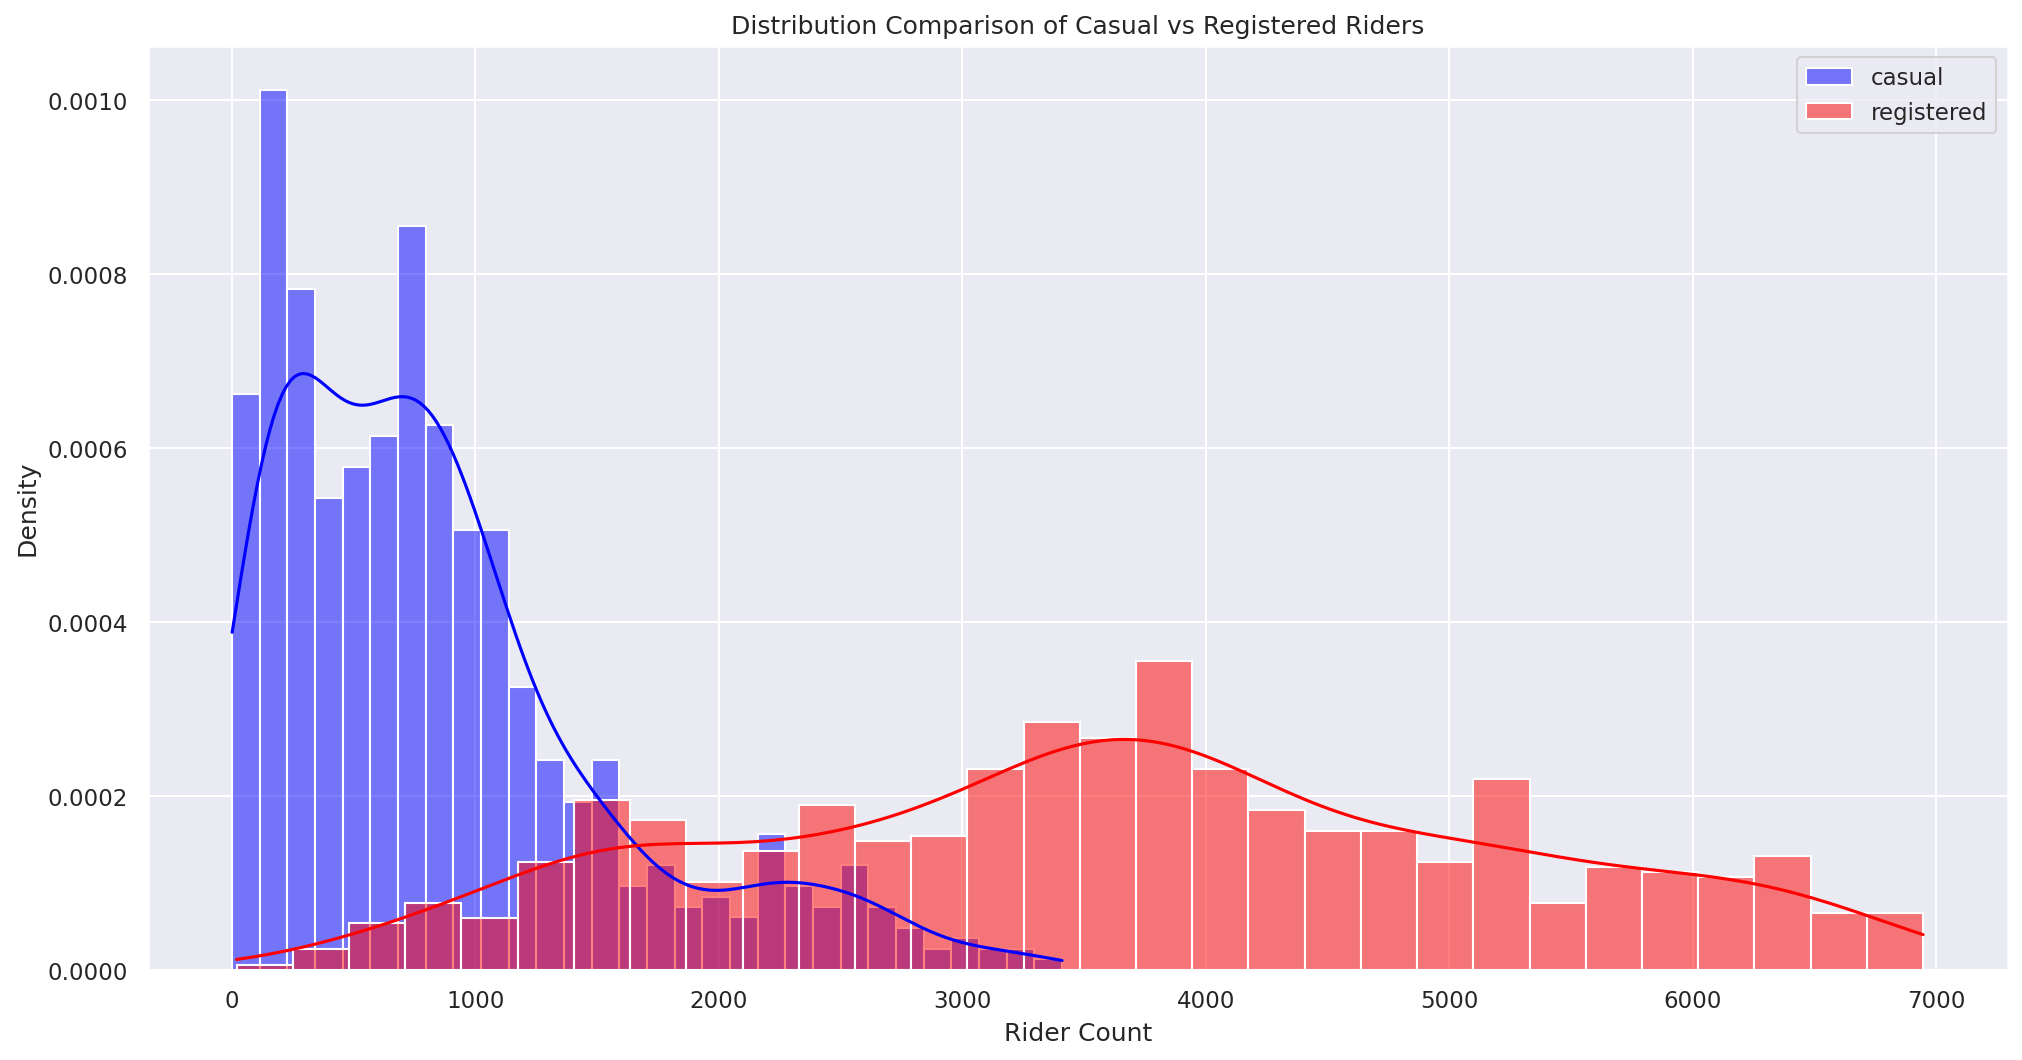

In [42]:
sns.histplot(daily_counts["casual"], color="blue", label="casual", kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(daily_counts["registered"], color="red", label="registered", kde=True, stat="density", bins=30, alpha=0.5)

plt.xlabel("Rider Count")
plt.ylabel("Density")
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.legend()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3b

In the cell below, describe the differences you notice between the density curves for casual and registered riders.  

- Consider concepts such as modes, symmetry, skewness, tails, gaps, and outliers. 

- Include a comment on the spread of the distributions. 

I saw these differences between density curves for casual and registered riders.
    
    Modes (Peaks in the Distribution)
        The casual riders have a peak at a lower rider count, indicating that most casual users take only a small number of rides on a given day while The registered riders have a peak at a higher rider count, meaning registered users consistently make up a larger share of the total ridership.

    Symmetry & Skewness
        The casual rider distribution appears to be left-skewed (negatively skewed), with a long left tail extending toward lower rider counts. I think this suggests that while most casual riders use the service sporadically, there are still some days with very few casual riders.
        The registered rider distribution appears to be right-skewed (positively skewed), with a longer right tail. This indicates that while most days have a typical number of registered riders, there are some extreme cases where registered rider counts are significantly higher.

    Tails & Outliers
        The casual rider distribution has a longer left tail, meaning there are some days with very few casual riders.
        The registered rider distribution has a long right tail, suggesting that on certain days, ridership increases significantly, possibly due to events, promotions, or specific seasonal effects.

    Gaps
        There appears to be a gap between the two distributions, meaning there are very few days where casual and registered ridership numbers are similar. This reflects different usage patterns between the two groups. 

    Spread of the Distributions
        The casual rider distribution is more spread out and concentrated at lower values, indicating greater variation in their ridership numbers.
        The registered rider distribution is more concentrated at higher values, showing that registered riders have a more stable and predictable usage pattern.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3c

The density plots do not show us how the counts for `registered` and `casual` riders vary together. 

Use `sns.lmplot` [(documentation)](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to create a scatter plot to investigate the relationship between casual and registered counts. 

- Use the `bike` `DataFrame` to plot hourly counts instead of daily counts.
- Color the points in the scatter plot according to whether or not the day is a working day. Your colors do not have to match ours exactly, but they should be different based on whether the day is a working day. 

<img src='images/casual_registered_working_nonworking.png' width="800px"  />

**Hints:** 
* Check out this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).
* There are many points in the scatter plot, so make them small to help reduce overplotting. Check out the `scatter_kws` parameter of `lmplot`.
* You can set the `height` parameter if you want to adjust the size of the `lmplot`.
* Add a descriptive title and axis labels for your plot.
* It is okay if the scales of your `x` and `y` axis (i.e., the numbers labeled on the two axes) are different from those used in the provided example.


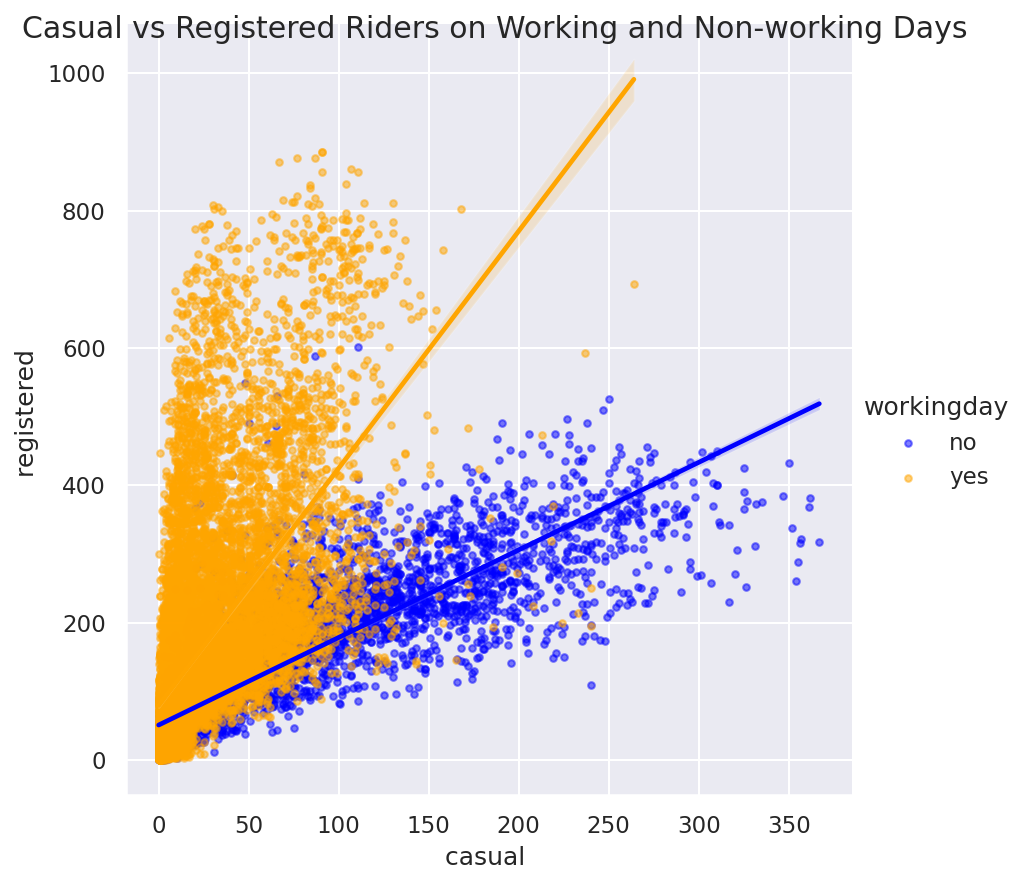

In [43]:
sns.set(font_scale=1) # This line automatically makes the font size a bit bigger on the plot. You do not need to change this line
plot = sns.lmplot(
    data=bike,
    x="casual", 
    y="registered", 
    hue="workingday", 
    palette={"no": "blue", "yes": "orange"},  
    scatter_kws={"s": 10, "alpha": 0.5},  
    height= 6
)

plot.set_axis_labels("casual ", "registered ")
plot.fig.suptitle("Casual vs Registered Riders on Working and Non-working Days")
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 3d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend? 

What effect does overplotting have on your ability to describe this relationship?

The scatterplot shows that registered riders are more active on working days, seeming to be a commuting behavior, while casual riders dominate non-working days, likely for leisure. The trend line for working days is steeper, indicating a stronger correlation between casual and registered riders, whereas on non-working days, the correlation is weaker. Overplotting makes it difficult to see individual data points, especially at lower counts, but transparency helps reveal the general trend. Despite some visualization challenges, the plot clearly highlights the differing usage patterns between casual and registered riders.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## Question 4: Visualization
 
To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate. You will want to read up on the documentation for `sns.kdeplot`, which can be found [here](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

The result we wish to achieve should be a plot that looks like this:

<img src='images/bivariate_kde_of_daily_rider_types_simple.png' width="600px" />

A basic KDE plot of all the data is quite easy to generate (see below). However, this plot combines both weekend and weekday data, which isn't what we want (see the example figure above).

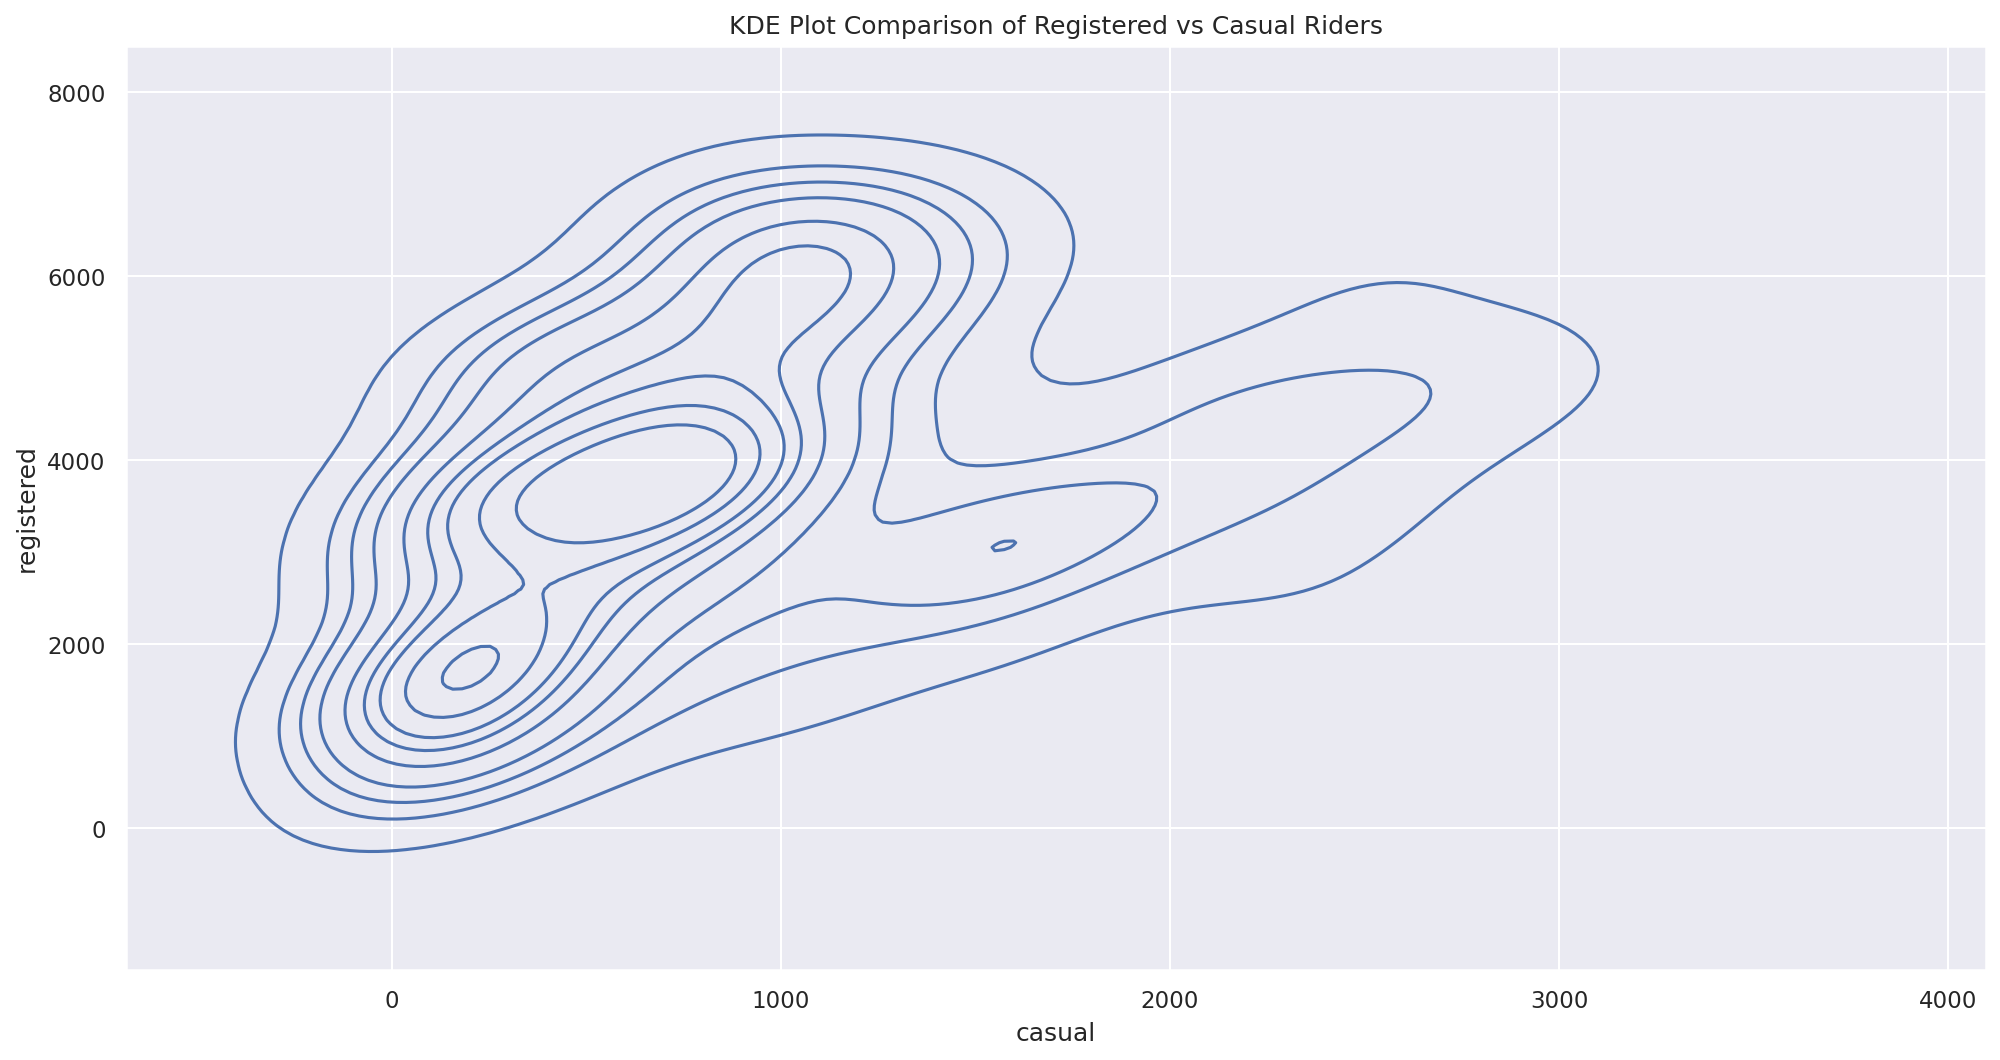

In [44]:
sns.kdeplot(data=daily_counts, x='casual', y='registered')
plt.title('KDE Plot Comparison of Registered vs Casual Riders');

<!-- BEGIN QUESTION -->

<br>

--- 

### Question 4a

Generate a bivariate kernel density plot with workday and non-workday separated using the `daily_counts` `DataFrame`. It should look like the first plot displayed above.

**Hint:** You only need to call `sns.kdeplot` once. Take a look at the `hue` parameter and adjust other inputs as needed.

After you get your plot working, experiment by setting `fill=True` in `kdeplot` to see the difference between the shaded and unshaded versions.

- But, **please submit your work with `fill=False`.**

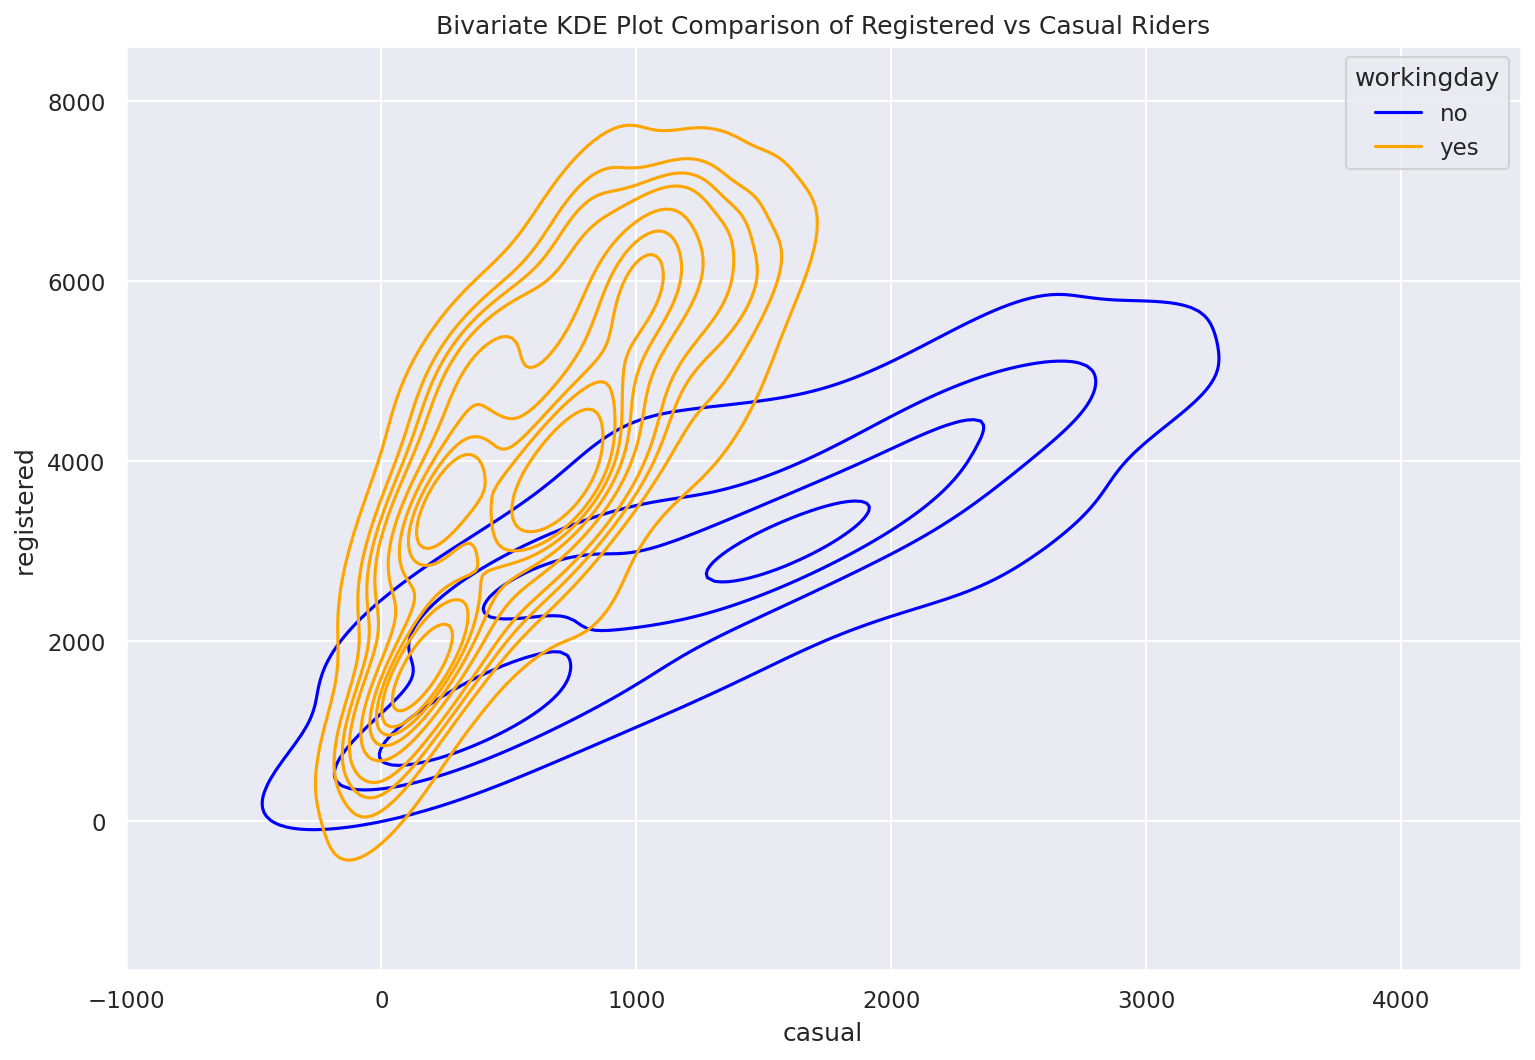

In [45]:
# Set the figure size for the plot
plt.figure(figsize=(12,8))
sns.kdeplot(
    data=daily_counts, 
    x="casual", 
    y="registered", 
    hue="workingday", 
    palette={"no": "blue", "yes": "orange"},  
    fill=False 
)

plt.xlabel("casual")
plt.ylabel("registered ")
plt.title("Bivariate KDE Plot Comparison of Registered vs Casual Riders")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 4b
<img src='images/bivariate_kde_of_daily_rider_types_gradient.png' width="800px" />

With some modification to your Question 4a code (this modification is not in scope), we can generate the plot above. 

In your own words, describe what the lines and the color shades of the lines signify about the data. What does each line and color represent? 

**Hint**: You may find it helpful to compare it to a contour or topographical map as shown [here](https://gisgeography.com/contour-lines-topographic-map/).

The bivariate KDE plot illustrates the density of casual and registered riders, with contour lines representing areas of equal density and color shades indicating intensity. Darker shades highlight regions with higher concentrations of riders, while lighter areas show lower-density points. The blue regions (non-workdays) indicate a broader spread of casual riders, suggesting varied usage, while the red regions (workdays) show a dense concentration of registered riders, reflecting consistent commuting patterns. This visualization confirms that registered riders are more active on workdays, while casual riders dominate on non-working days.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 4c

What additional details about the riders can you identify from this contour plot that were difficult to determine from the scatter plot?

I think the contour plot provides a clear visualization of density patterns and smoother, more interpretable view of riders trends, that were difficult to interpert in the scatter plot due to overplotting.Moreover, i notices from this contour plot, there are some different from the scatter plot, High_Density Regions, Distinct Usage patters, variability in casual riders, and distribution spread 

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## Question 5: Understanding Daily and Monthly Patterns

<br>

--- 

### Question 5a
Create a new column in the `bike` `DataFrame` called `time_category`, which maps the `hr` column into the following broader time categories:

- **Midnight**: 2 AM to before 5 AM  
- **Morning**: 5 AM to before 11 AM  
- **Lunch Time**: 11 AM to before 2 PM  
- **Afternoon**: 2 PM to before 5 PM  
- **Evening**: 5 PM to before 9 PM  
- **Night**: 9 PM to before 2 AM  

Then, display the first few rows of the updated `DataFrame` to verify that the new column is correctly added.

In [46]:
def hour_to_category(hr):
    if 2 <= hr < 5:
        return "Midnight"
    elif 5 <= hr < 11:
        return "Morning"
    elif 11 <= hr < 14:
        return "Lunch Time"
    elif 14 <= hr < 17:
        return "Afternoon"
    elif 17 <= hr < 21:
        return "Evening"
    else:
        return "Night"
bike["time_category"] = bike["hr"].apply(hour_to_category)

bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,Night
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,Night
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,Midnight
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,Midnight
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,Midnight


In [47]:
grader.check("q5a")

q5a results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 5b

Let’s examine the behavior of riders by plotting the **average number of riders** for each **time category** (using the `time_category` column), separated by rider type.

Your plot should look like the plot below. It's fine if your plot's colors don't match ours exactly.

**Hint:**  
To label the x-axis correctly, use `plt.xticks()` to manually set tick positions and labels. You may need to rotate the labels for readability. Refer to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) for more details.

<img src='images/time_category_bikes.png' width="700px" />                                                                   

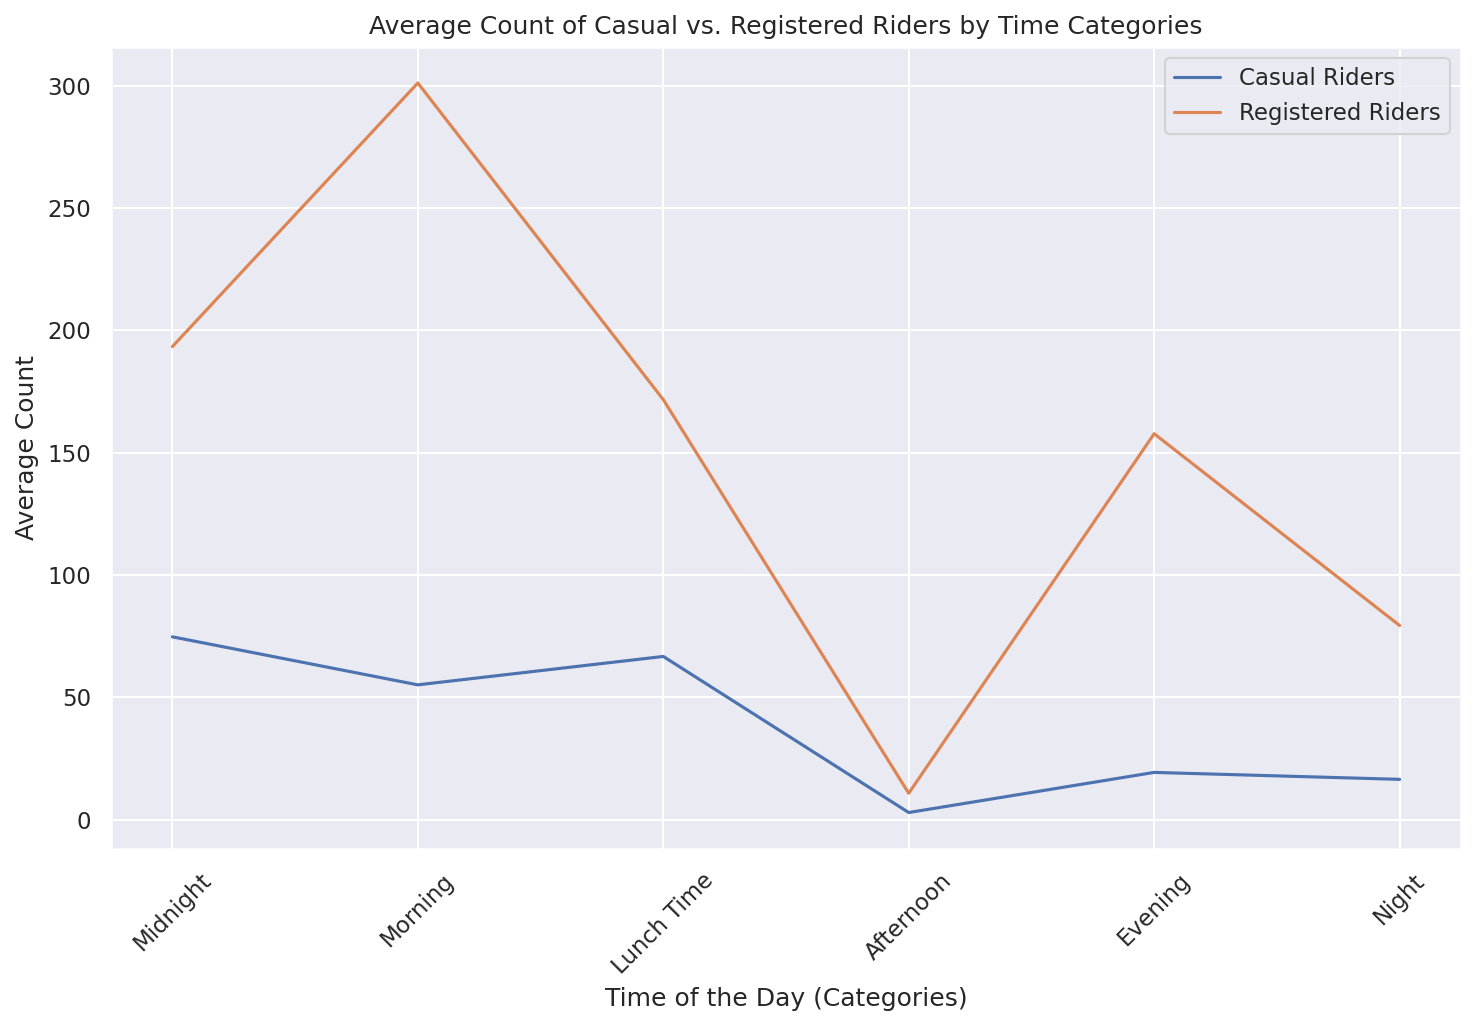

In [48]:
# Group by time category and calculate means
time_category_means = (
    bike.groupby("time_category")[["casual", "registered"]].mean()
)

plt.figure(figsize=(10, 7))
sns.lineplot(
    data=time_category_means.reset_index(),
    x="time_category",
    y="casual",
    label="Casual Riders",
)
sns.lineplot(
    data=time_category_means.reset_index(),
    x="time_category",
    y="registered",
    label="Registered Riders",
)

plt.xlabel("Time of the Day (Categories)")
plt.ylabel("Average Count")
plt.title("Average Count of Casual vs. Registered Riders by Time Categories")
plt.xticks(
    ticks=range(len(time_category_means)),  # Order categories
    labels=["Midnight", "Morning", "Lunch Time", "Afternoon", "Evening", "Night"],
    rotation=45 # Rotate x-axis labels for readability
)  
plt.legend()
plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 5c

Next, analyze how the average count of casual and registered riders varies by month (`mnth`). 

Compute the average number of casual and registered riders for each month in the dataset and create a line plot showing the trends.

Your plot should look like the plot below. It's fine if your plot's colors don't match ours exactly.


<img src='images/monthly_avg_riders.png' width="700px" />


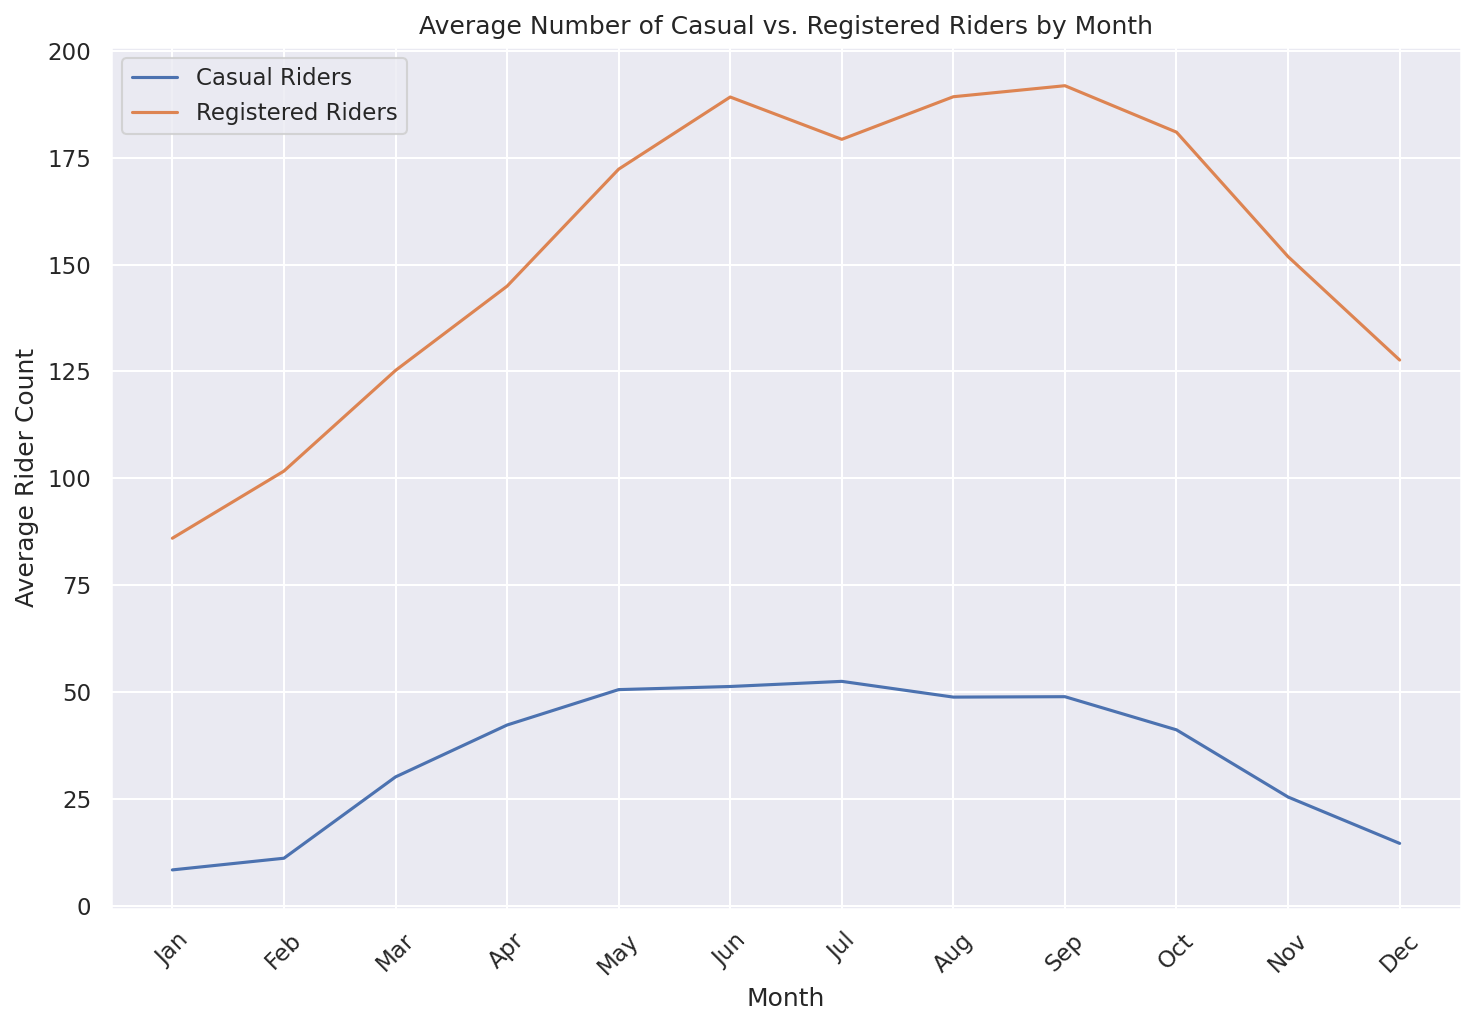

In [49]:
# Group by month and calculate mean rider counts
avg_riders_by_month = bike.groupby("mnth")[["casual", "registered"]].mean()

plt.figure(figsize=(10, 7))

# Plot casual riders
sns.lineplot(
    data=avg_riders_by_month.reset_index(),
    x="mnth",
    y="casual",
    label="Casual Riders"
)

# Plot registered riders
sns.lineplot(
    data=avg_riders_by_month.reset_index(),
    x="mnth",
    y="registered",
    label="Registered Riders"
)

# Formatting
plt.xlabel("Month")
plt.ylabel("Average Rider Count")
plt.title("Average Number of Casual vs. Registered Riders by Month")
plt.xticks(
    ticks=range(1, 13),  # Months range from 1 to 12
    labels=[
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ],
    rotation=45  # Rotate x-axis labels for readability
)
plt.legend()
plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 5d

What can you observe from the plots generated in **5b** and **5c**? 

Discuss your observations for both types of riders, and hypothesize about the meaning of the peaks and troughs of both riders' distributions.

For 5b,
    Registered Riders: Peak usage occurs in the morning (5 AM - 11 AM) and evening (5 PM - 9 PM), which aligns with typical commuting hours. This suggests that registered riders primarily use bike-sharing services for work or school commutes.
    Casual Riders: Usage is more spread out but generally lower than registered riders. There is a slight increase around lunch time (11 AM - 2 PM) and evening, suggesting casual riders use bikes for leisure or errands rather than strict commuting.

For 5c,
    Both casual and registered riders increase during warmer months (March - September), with a peak in July and August. This suggests that weather conditions heavily influence bike usage, with more people opting for biking when conditions are favorable.
    Casual Riders: Their ridership drops sharply in colder months, indicating that weather plays a major role in casual bike use.
    Registered Riders: While their ridership also decreases in winter, the decline is less steep compared to casual riders. This implies that commuters are more consistent in their bike usage, regardless of season.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## Question 6: Exploring Ride-Sharing and Weather
Now let's examine how the weather may be associated. First, let's look at how the proportion of casual riders changes as the weather changes.

<br>

--- 

### Question 6a
Create a new column `prop_casual` in the `bike` `DataFrame` representing the proportion of casual riders out of all riders for each record.

In [50]:
bike["prop_casual"] = bike["casual"] / (bike["casual"] + bike["registered"])
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_category,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,Night,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,Night,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,Midnight,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,Midnight,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,Midnight,0.000000


In [51]:
grader.check("q6a")

q6a results: All test cases passed!


In order to examine the relationship between the proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). 

- We can even use color/hue to encode the information about the day of the week. 

Run the cell below, and you'll see we end up with a big mess that is impossible to interpret.

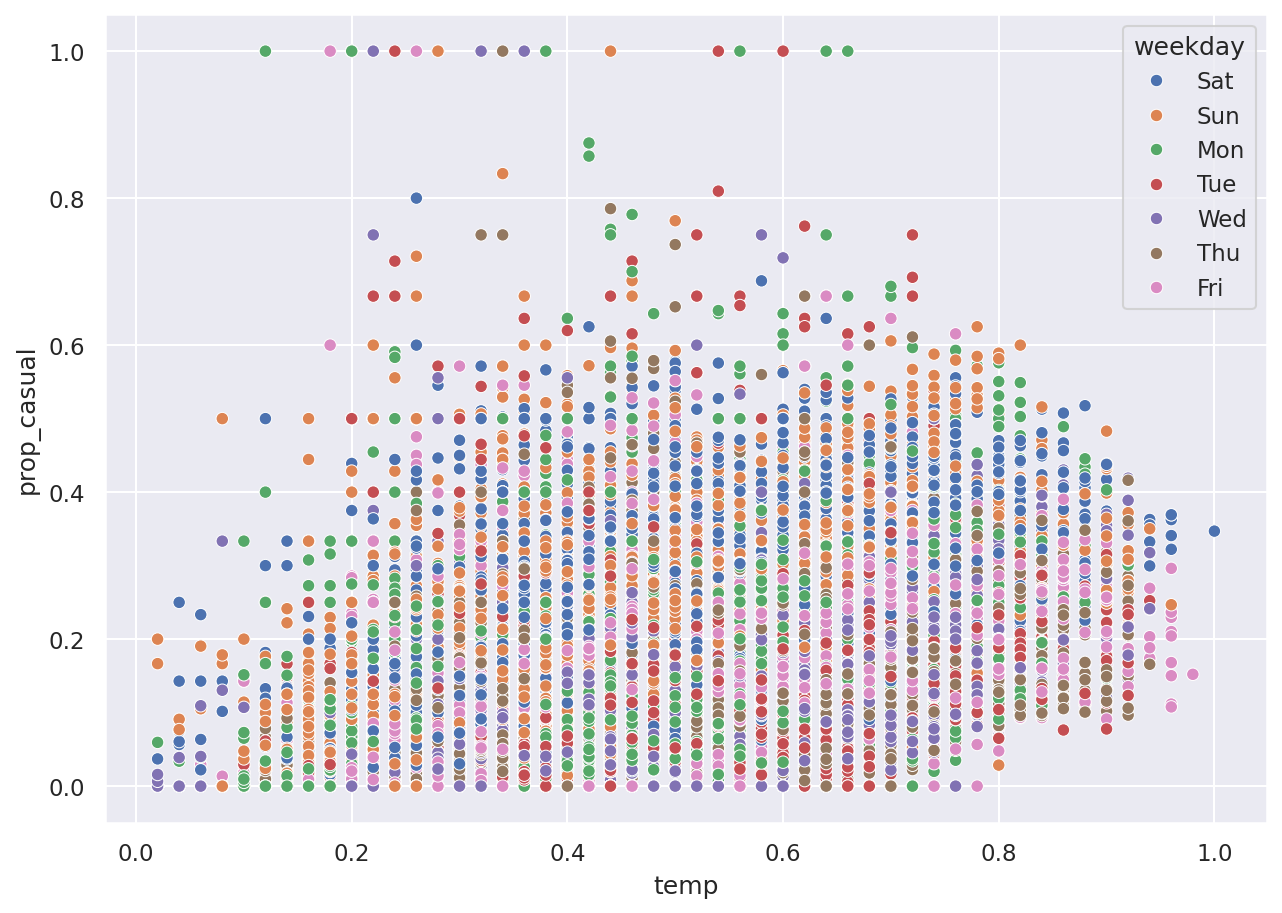

In [52]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=bike, x='temp', y='prop_casual', hue='weekday');

We could attempt linear regression using `sns.lmplot` as shown below, which hints at some relationships between temperature and proportional casual, but the plot is still fairly unconvincing. 

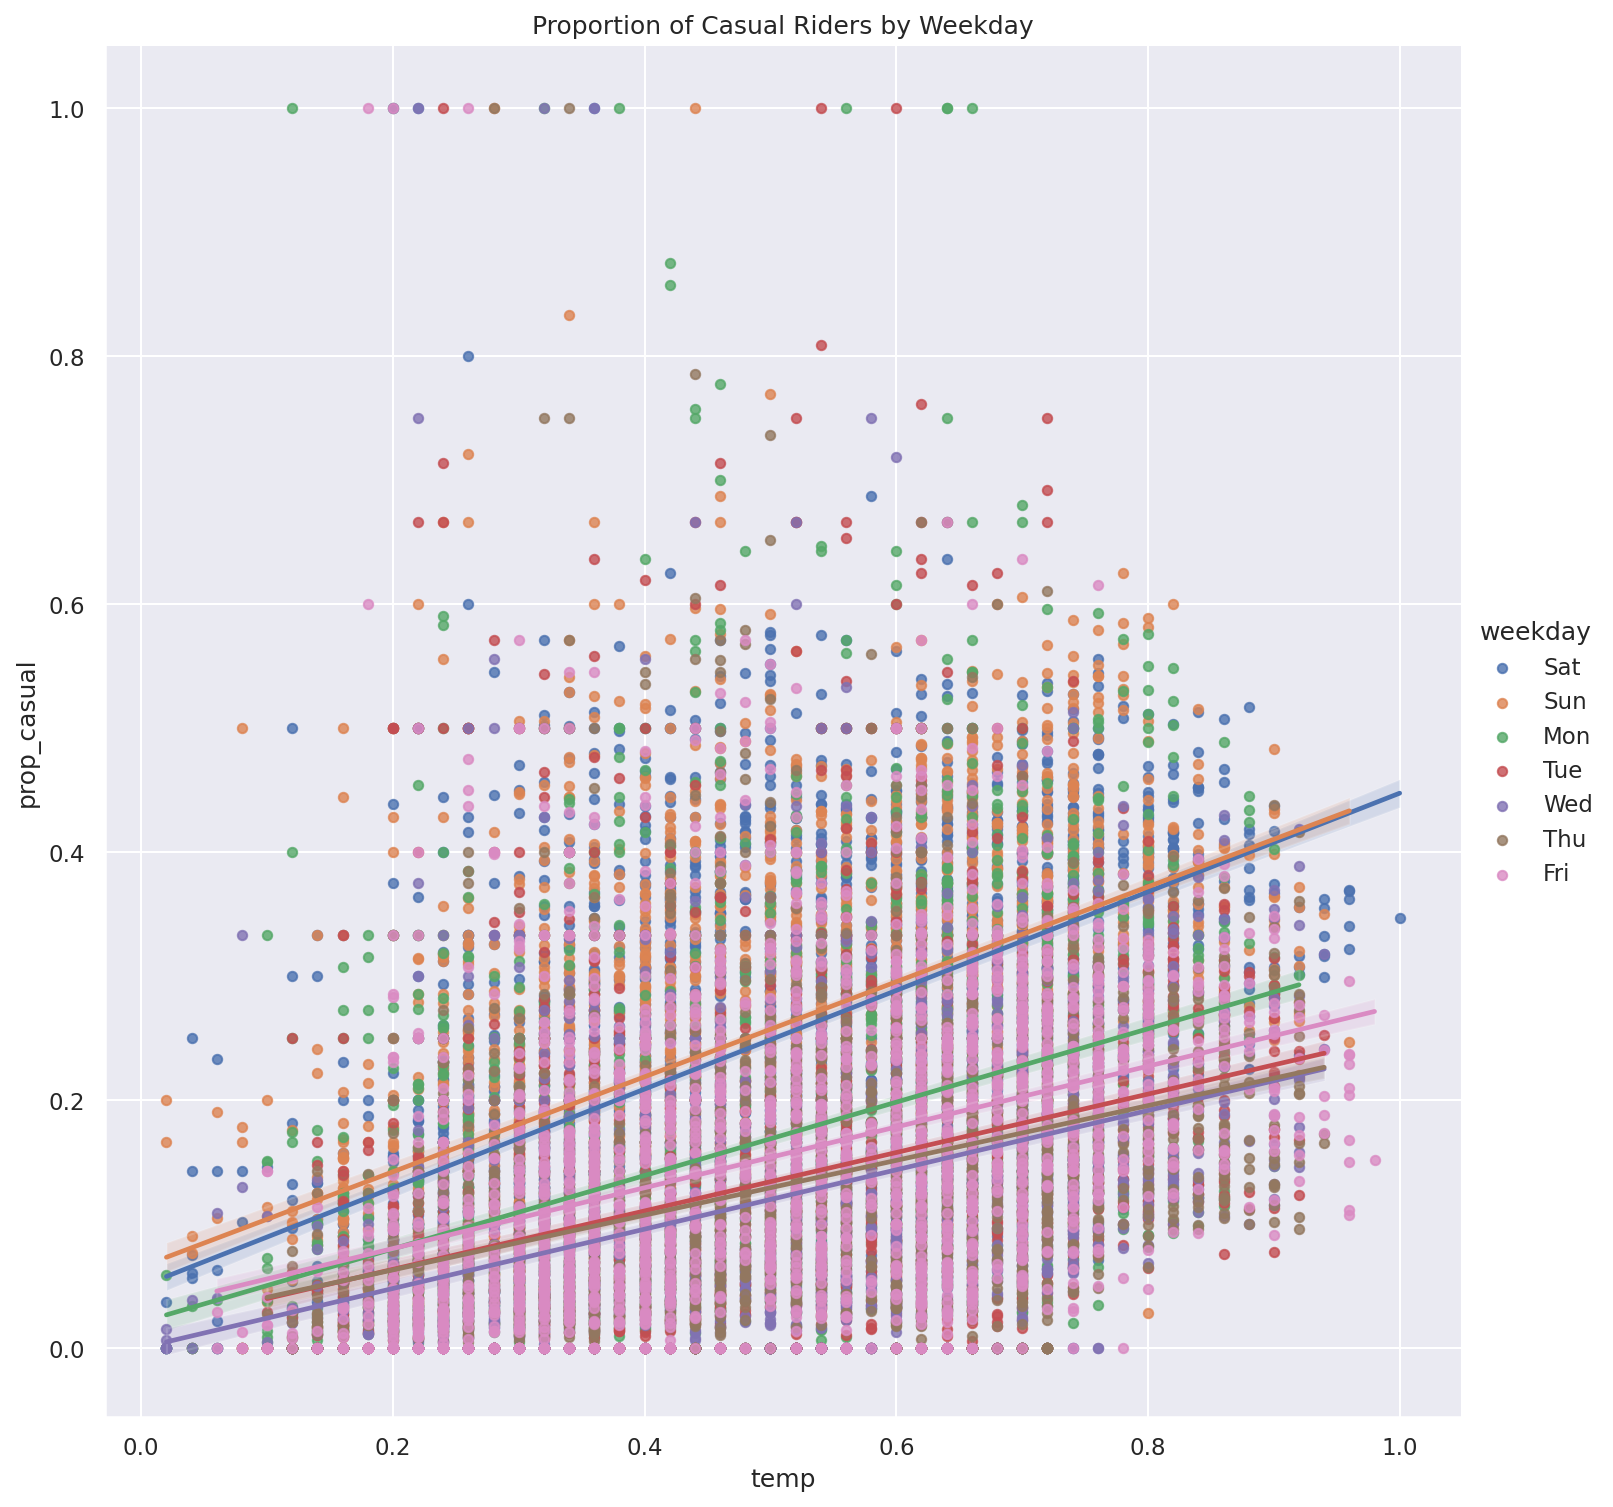

In [53]:
sns.lmplot(data=bike, x='temp', y='prop_casual', hue='weekday', scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

A better approach to visualize the relationship between temperature and the proportion of casual riders is to use local smoothing techniques.

- The basic idea is to compute a representative `y` value for each `x` value that captures the data close to that `x` value.

- One such technique is "Locally Weighted Scatterplot Smoothing" (LOWESS/LOESS). 

Below is an example where the red curve represents a smoothed pattern in the scatterplot.

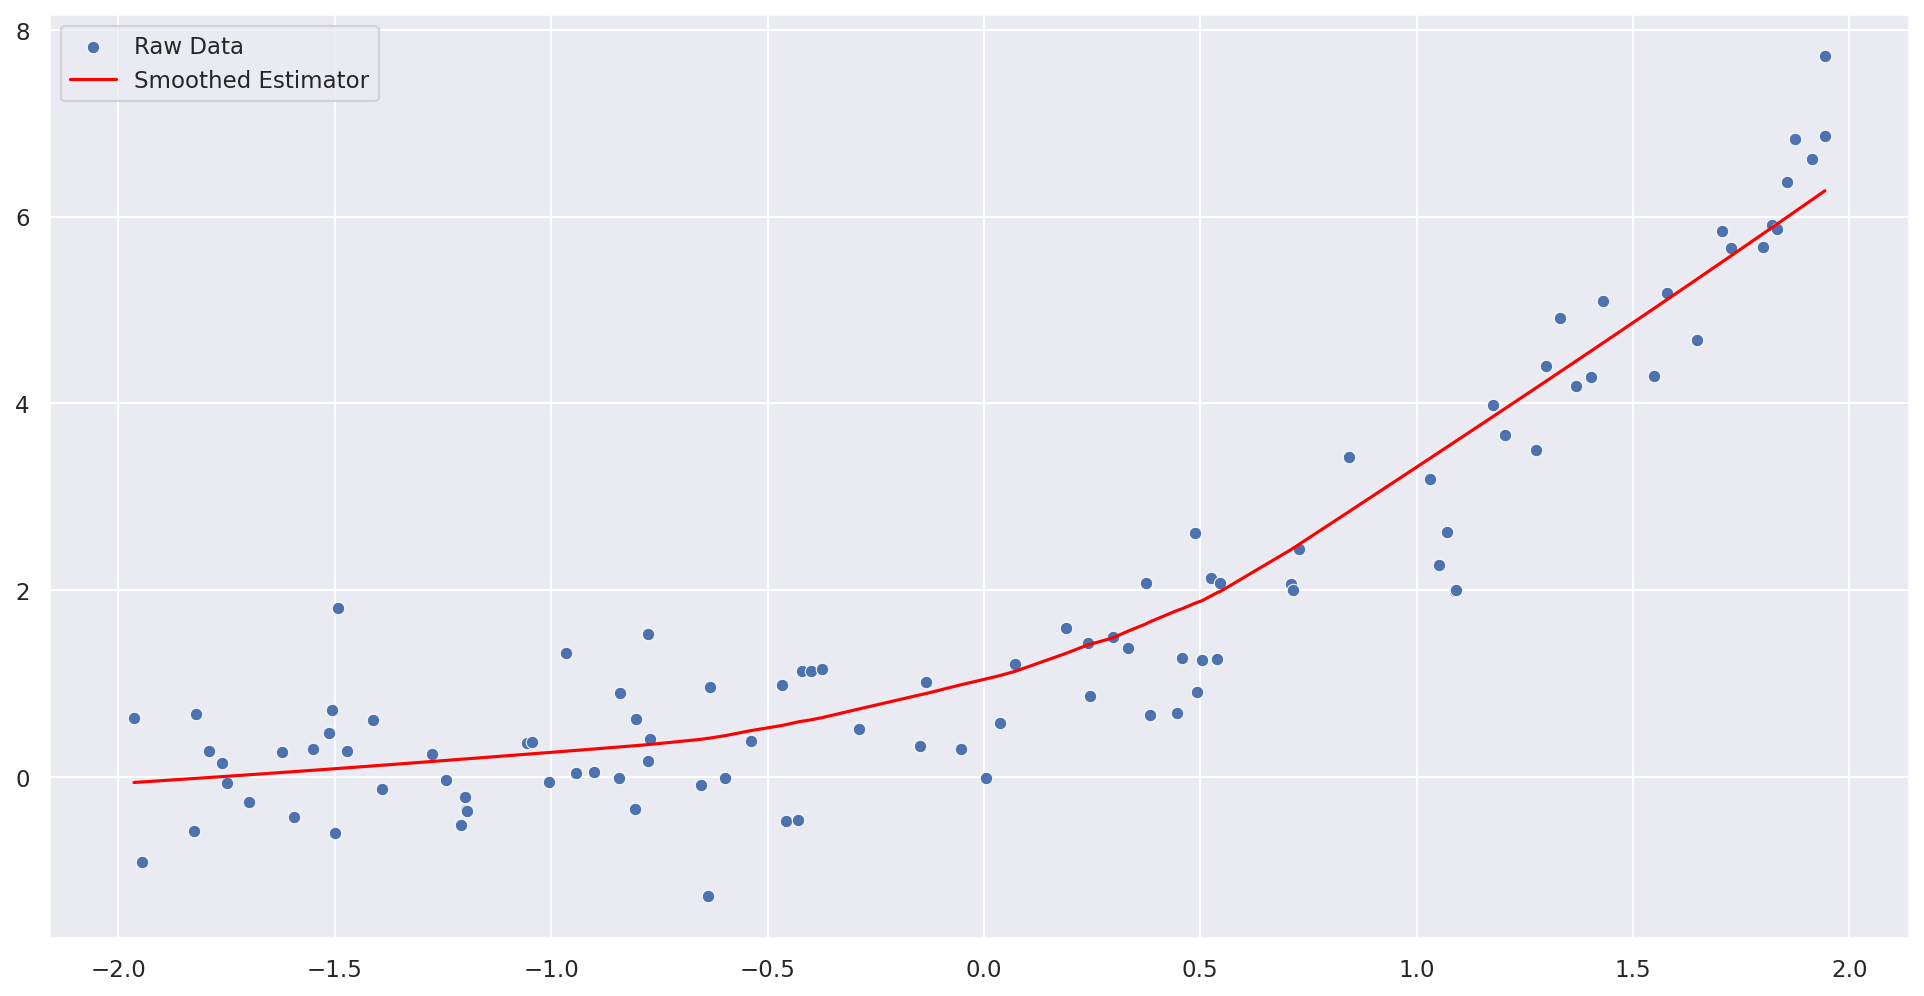

In [54]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
x_obs = np.sort(np.random.rand(100)*4.0 - 2)
y_obs = np.exp(x_obs) + np.random.randn(100) / 2.0

# Plot a regular scatterplot with our noisy data 
sns.scatterplot(x=x_obs, y=y_obs, label="Raw Data")

# Pass in the noisy data to lowess to generate the smoothed y-values, 
# we want to preserve the relative ordering of the y-values, which is why return_sorted=False
y_smooth = lowess(y_obs, x_obs, return_sorted=False)

# Plot a red line using the smoothed y-values
sns.lineplot(x=x_obs, y=y_smooth, label="Smoothed Estimator", color='red')
plt.legend();

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 6b

Draw 7 smoothed curves on a single plot, one for each day of the week. 

- The x-axis should be the temperature (as given in the `'temp'` column).

- The y-axis should be a smoothed version of the proportion of casual riders. 

<img src="images/curveplot_temp_prop_casual.png" width="600px" />

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. 

- Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. 

You do not need to match the colors on our sample plot as long as the colors in your plot make it easy to distinguish which day they represent.

**Hints:** 
* Start by plotting only one day of the week to make sure you can do that first. Then, consider using a `for` loop to repeat this plotting operation for all days of the week.

* The `lowess` function expects the `y` coordinate first, then the `x` coordinate. You should also set the `return_sorted` field to `False`.

* **You will need to rescale the normalized temperatures stored in this dataset to Fahrenheit values.** Look at the section of this notebook titled 'Loading Bike Sharing Data' for a description of the (normalized) temperature field to know how to convert back to Celsius first. After doing so, convert it to Fahrenheit. By default, the temperature field ranges from 0.0 to 1.0. In case you need it, $\text{Fahrenheit} = \text{Celsius} \times \frac{9}{5} + 32$. If you prefer plotting temperatures in Celsius, that's fine as well! Just remember to convert accordingly so the graph is still interpretable. In addition, for smoother curves, use `sns.lineplot` instead of Matplotlib's default plotting functions.  
This helps avoid "noisy" jagged lines that might appear with `plt.plot` or `plt.scatter`.

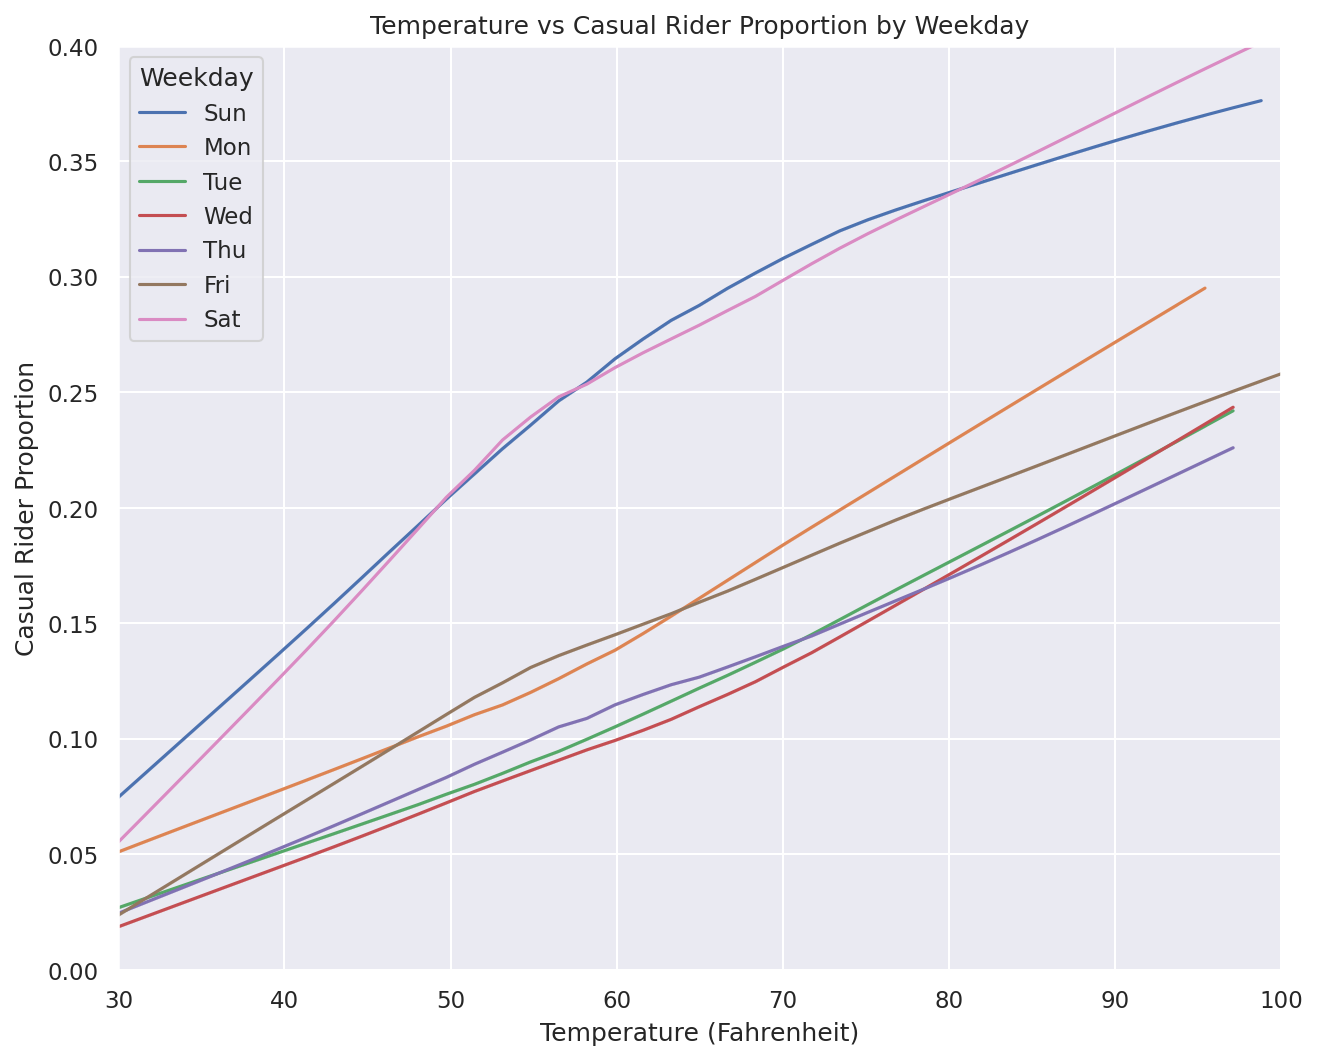

In [55]:
from statsmodels.nonparametric.smoothers_lowess import lowess

bike["temp_fahrenheit'C"] = bike["temp"] * (39 - (-8)) + (-8) 
bike["temp_fahrenheit"] = bike["temp_fahrenheit'C"] * 9/5 + 32  

plt.figure(figsize=(10, 8))
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]

for day in weekdays:
    subset = bike[bike["weekday"] == day]
    smoothed = lowess(subset["prop_casual"], subset["temp_fahrenheit"], return_sorted=False)
    sns.lineplot(x=subset["temp_fahrenheit"], y=smoothed, label=day)

plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.legend(title="Weekday")

plt.xlim(30, 100)  
plt.ylim(0.0, 0.4)  
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 6c
Examine the plot above and describe how casual ridership changes with temperature. Determine if the **plot alone** provides evidence of a **causal** relationship between temperature and casual ridership, and explain your reasoning. 

Finally, based on **your own intuition**, state whether you think there is a underlying causal relationship. Justify your answer. 

The plot clearly shows that as temperatures rise, casual ridership increases. It says that People are more likely to ride bikes in warm weather, especially on weekends when they have more free time. However, after around 80-90°F, ridership seems to level off or even slightly decline, which makes sense—extreme heat can make biking uncomfortable.

That said, the plot alone doesn’t prove that temperature causes more casual ridership. Other factors, like longer daylight hours, seasonality, and even precipitation, could be influencing the trend. Warmer temperatures often come with better weather overall, which might be a bigger factor than temperature alone.

Still, it’s pretty reasonable to believe that temperature does have a direct impact on casual ridership. People don’t want to bike in freezing weather, and they also tend to avoid extreme heat. But to be completely sure, we’d need more data—like accounting for rainfall, wind, and other seasonal trends—to separate temperature’s true effect from everything else happening at the same time.

<!-- END QUESTION -->

<hr style="border: 1px solid #fdb515;" />

## Question 7: Expanding our Analysis

<!-- BEGIN QUESTION -->

<br>

--- 

### Question 7a

Imagine you are working for a bike-sharing company that collaborates with city planners, transportation agencies, and policymakers in order to implement bike-sharing in a city. These stakeholders would like to reduce congestion and lower transportation costs. They also want to ensure the bike-sharing program is implemented equitably. In this sense, equity is a social value that informs the deployment and assessment of your bike-sharing technology. 

Equity in transportation includes: Improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford transportation services and assessing how inclusive transportation systems are over time. 

Do you think the `bike` data as it is can help you assess equity? If so, please explain. If not, how would you change the dataset? 

You may discuss how you would change the granularity, what other kinds of variables you'd introduce to it, or anything else that might help you answer this question.

**Note**: There is no single "right" answer to this question – we are looking for thoughtful reflection and commentary on whether or not this dataset, in its current form, encodes information about equity.


Right now, the bike dataset isn’t enough to assess equity in transportation. While it tells us when and how often people ride, it doesn’t give us any information about who is using the bikes or where they are riding. So, We do not have enough data to tell that. Moreover, That’s a big gap when it comes to understanding whether bike-sharing is accessible to everyone.

For example, the dataset doesn’t include demographics like income, gender, or race, so we have no way of knowing if certain groups are underrepresented in bike usage. It also doesn’t track where bikes are picked up and dropped off, meaning we can’t tell if lower-income neighborhoods have the same access to bike stations as wealthier areas. And since there’s no pricing information, we can’t analyze whether cost is a barrier for some people.

To make this dataset more useful for assessing equity, I’d suggest adding demographic details (where possible), geographic data (like ZIP codes or neighborhoods), and cost information. This would help city planners and policymakers ensure that bike-sharing isn’t just benefiting a small group of people but is actually affordable and accessible to everyone. Right now, we can analyze ridership trends, but without more data, we can’t say much about fairness or inclusion.

<!-- END QUESTION -->



In [56]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<!-- BEGIN QUESTION -->

<br>

--- 
### Question 7b
[Bike sharing is growing in popularity](https://www.bts.gov/newsroom/bike-share-stations-us), and new cities and regions are making efforts to implement bike-sharing systems that complement their other transportation offerings. The [goals of these efforts](https://www.wired.com/story/americans-falling-in-love-bike-share/) are to have bike sharing serve as an alternate form of transportation in order to alleviate congestion, provide geographic connectivity, reduce carbon emissions, and promote inclusion among communities.

Bike-sharing systems have spread to many cities across the country. The company you work for asks you to determine the feasibility of expanding bike sharing to additional cities in the US. 

Based on your plots in this assignment, would you recommend expanding bike sharing to additional cities in the US? If so, what cities (or types of cities) would you suggest? 

Please list at least two reasons why, and mention which plot(s) you drew your analysis from. 

**Note**: There isn't a set right or wrong answer for this question. Feel free to come up with your own conclusions based on evidence from your plots! 


Yes, I’d recommend expanding bike-sharing to more cities, especially urban areas with heavy commuting traffic and seasonal biking trends. From the previous visualization plots, I see that the time-of-day analysis (5b) shows peaks in the morning and evening, meaning people use bikes to get to work. Cities like New York, D.C., and Chicago, where traffic congestion is a problem, would benefit. And the monthly trends (5c) show a big increase in ridership during warmer months, making cities with mild winters or strong summer activity (like San Francisco, Austin, and Seattle) great candidates.

So, I would say expanding is the good sign and it is also a benefit for our Green environment. Cities with good public transit and bike-friendly infrastructure would see the most success. Expanding bike-sharing in the right locations can help reduce congestion, improve connectivity, and lower emissions.

<!-- END QUESTION -->



In [57]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 4!
# Jiayin Lin's guinea pig, Pig, says "great job!"
<img src = "images/pig.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://forms.gle/XGzXnPQ9JmgXhbo29). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 4 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 4 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your **plots/graphs and written responses** were generated and submitted correctly to the HW 4 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 4 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline. 

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [58]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q5a results: All test cases passed!

    q6a results: All test cases passed!
